OPTIMAL SOLUTION:
X: 200.0
Y: 300.0
Z: 0.0
Minimum cost: 1900.0


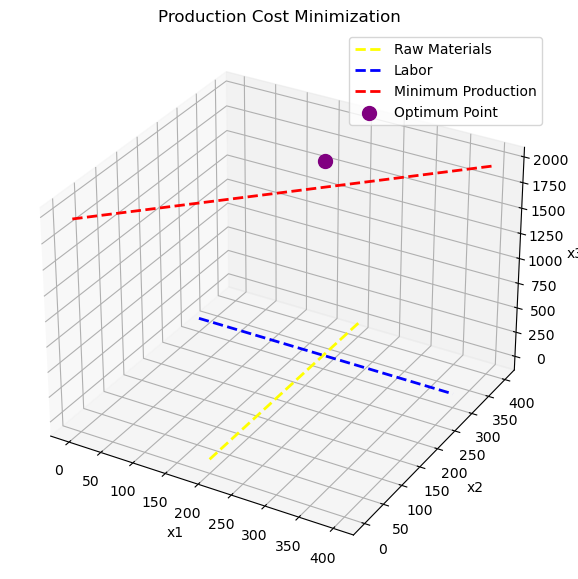

In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pulp import LpVariable, LpMinimize, LpProblem

#the problem
problem = LpProblem(name="Production_minimizing", sense=LpMinimize)

#decision variables
x1 = LpVariable(name="x", lowBound=0)
x2 = LpVariable(name="y", lowBound=0)
x3 = LpVariable(name="z", lowBound=0)

# Define the objective function coefficients
problem += 5*x1 + 3*x2 + 4*x3, "objective"

# Coefficients of the inequality constraints
problem += 2*x1 + 3*x2 + x3 <= 1000, "raw_materials"
problem += 4*x1 + 2*x2 + 5*x3 <= 120, "labour"
problem += x1 >= 200
problem += x2 >= 300
problem += x3 >= 150


# Solve 
problem.solve()

# Display the results
print("OPTIMAL SOLUTION:")
print(f"X: {x1.varValue}")
print(f"Y: {x2.varValue}")
print(f"Z: {x3.varValue}")
print(f"Minimum cost: {problem.objective.value()}")


# plotting the graph

# Create a meshgrid for x1, x2, and x3
x1_vals = np.linspace(0, 400, 50)
x2_vals = np.linspace(0, 400, 50)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# Calculate the corresponding z-values (objective function)
z_vals = 5 * x1_grid + 3 * x2_grid + 4 * (1950 - x1_grid - x2_grid)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the feasible region (constraints)
ax.plot([200, 200], [0, 400], [0, 0], color='yellow', linestyle='--', linewidth=2, label='Raw Materials')
ax.plot([0, 400], [300, 300], [0, 0], color='blue', linestyle='--', linewidth=2, label='Labor')
ax.plot([0, 400], [0, 400], [1950, 1950], color='red', linestyle='--', linewidth=2, label='Minimum Production')


optimum_x1 = 200
optimum_x2 = 300
optimum_z = 1950
ax.scatter(optimum_x1, optimum_x2, optimum_z, color='purple', s=100, label='Optimum Point')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Production Cost Minimization')
ax.legend()
plt.show()